In [2]:
import urllib 
from bs4 import BeautifulSoup  
import logging  
from urllib.request import urlopen
import requests
import re
import pandas as pd

In [3]:
def get_pages ():
    big_url_list = []
    for i in range(0,10):
        url = 'http://www.boxofficemojo.com/yearly/chart/?yr=200' + str(i) + '&p=.htm'
        big_url_list.append(url)
    for i in range(10, 16):
        url = 'http://www.boxofficemojo.com/yearly/chart/?yr=20' + str(i) + '&p=.htm'
        big_url_list.append(url)
    return big_url_list

In [65]:
def get_soup(url):
    #for url in url_list:
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, 'lxml')
    return soup

In [6]:
def generate_links(soup):
    my_list = []
    for link in soup.find("body").find_all('a', href=True):
        if link['href'].startswith('/movies/?id='):
            my_list.append('http://www.boxofficemojo.com' + link['href'])
        elif link['href'] == '' or link['href'].startswith('#'):
            continue
    link_list = (my_list[1:])
    return(link_list)

In [7]:
def movie_links(links, url_set):
    for link in links:
        url = 'http://www.boxofficemojo.com' + str(link)
        url_set.append(url)
    return url_set

In [8]:
def get_title(pages):
    titleList = []
    for url in pages:
        title_string = get_soup(url).find('title').text
        title = title_string.split('(')[0].strip()
        titleList.append(title)
    return titleList

['http://www.boxofficemojo.com/movies/?id=grinch.htm',
 'http://www.boxofficemojo.com/movies/?id=castaway.htm',
 'http://www.boxofficemojo.com/movies/?id=mi2.htm',
 'http://www.boxofficemojo.com/movies/?id=gladiator.htm',
 'http://www.boxofficemojo.com/movies/?id=whatwomenwant.htm']

In [9]:
import dateutil.parser

def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '')
    return int(moneystring)

def runtime_to_minutes(runtimestring):
    runtime = runtimestring.split()
    try:
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None

In [321]:
soup = get_soup('http://www.boxofficemojo.com/movies/?id=jurassicpark4.htm')
my_list = []
for link in soup.find("body").find_all('a', href=True):
        if link['href'].startswith('/people/chart/?view=Director&id='):
            print(link.text)       

Colin Trevorrow


In [10]:
from collections import defaultdict
def get_movie_values(pages, field_names):
    temp = []
    tempdict = defaultdict(list)
    count = 0
    '''Grab a value from boxofficemojo HTML
    
    Takes a string attribute of a movie on the page and returns the string in the next sibling object
    (the value for that attribute)or None if nothing is found. '''
    for url in pages:
        soup = get_soup(url)
        
        for name in field_names:
            obj = soup.find(text=re.compile(name))
            
            if not obj: 
                return None
            next_sibling = obj.findNextSibling()
            if next_sibling:
                tempdict[name].append(next_sibling.text)
            else:
                tempdict[name].append('0')   

    return tempdict

In [ ]:
a = soup.find(class = "mp_box_content"):

In [403]:
def get_director_value(pages, name)
    for url in pages:
        for link in soup.find("body").find_all('a', href=True):
            try:
                if link['href'].startswith('/people/chart/?view=Director&id='):
                tempdict['Director'].append(link.text)
            except:
                return None


IndentationError: expected an indented block (<ipython-input-403-b45cce3ea044>, line 4)

In [382]:
            
for link in soup.find("body").find_all('a', href=True):
    if link['href'].startswith('/people/chart/?view=Director&id='):
            print(count)
            tempdict['Director'].append(link.text)
    else:

IndentationError: expected an indented block (<ipython-input-382-b0cbee4385d8>, line 4)

In [11]:
def data_series(rawInfo, title, obs):
    DomesticList = []
    ReleaseList = []
    RuntimeList = []
    RatingList = []
    DirectorList = []

    for raw in rawInfo['Domestic Total']:
        DomesticList.append(money_to_int(raw))
    
    for raw in rawInfo['Release Date']:
         ReleaseList.append(to_date(raw))
        
    for raw in rawInfo['Runtime']:
        RuntimeList.append(runtime_to_minutes(raw))
        
    for raw in rawInfo['MPAA Rating']:
        RatingList.append(raw)
    
    for raw in rawInfo['Director']:
        DirectorList.append(raw)
    
    d = {'title' : pd.Series(title, index=range(1,obs)),
         'Domestic Total Gross' : pd.Series(DomesticList, index = range(1,obs)),
         'Release Date' : pd.Series(ReleaseList, index = range(1,obs)),
         'Runtime' : pd.Series(RuntimeList, index = range(1,obs)),
         'Rating' : pd.Series(RatingList, index = range(1,obs)),
         'Rank' : pd.Series(range(1,1601), index = range(1,obs))}
         #'Director' : pd.Series(DirectorList, index = range(1,101))}
    return d

# * Run Program *

In [12]:
field_names = ['Release Date', 'Domestic Total', 'Runtime', 'MPAA Rating']

In [67]:
pages = []

for url in get_pages():
    soup_result = get_soup(url)
    for links in generate_links(soup_result):
        pages.append(links)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="en">
<HEAD>
<TITLE>2000 Yearly Box Office Results - Box Office Mojo</TITLE>
<META NAME="keywords" CONTENT="2000, year, yearly, box, office, result, list, movie, movies, listing, listings, top movies, all time, film">
<META NAME="description" CONTENT="Yearly box office results for 2000.">
<link rel="stylesheet" href="/css/mojo.css?1" type="text/css" media="screen" title="no title" charset="utf-8">
<link rel="stylesheet" href="/css/mojo.css?1" type="text/css" media="print" title="no title" charset="utf-8"></head>
<body>
	<iframe id="sis_pixel_sitewide" width="1" height="1" frameborder="0" marginwidth="0" marginheight="0" style="display: none;"></iframe>
<script>
    setTimeout(function(){
        try{
            //sis3.0 pixel
            var cacheBust = Math.random() * 10000000000000000,
                url_sis3 = 'http://s.amazon-adsystem.com/iu3?',
                params

In [56]:
rawdict = get_movie_values(pages, field_names)

1600

In [66]:
title = get_title(pages)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="en">
<head>
<meta http-equiv="Content-type" content="text/html;charset=iso-8859-1">
<title>How the Grinch Stole Christmas (2000) - Box Office Mojo</title>

<style type="text/css">
table.chart-wide { width: 100%; }
</style>
<META name="keywords" content="how the grinch stole christmas, movie, film, box office, result, records, charts, revenue, opening weekend, gross, worldwide, overseas, foreign, news, reviews, articles, stories, story, analysis, revenue, release date, mpaa rating, genre, running time, length, budget, production budget, distributor, studio, universal, theatrical summary, theatrical, daily box office results, weekend box office results, weekly box office, weekly box office, international box office summary, worldwide box office summary, similar movies, box office mojo">
<META name="description" content="How the Grinch Stole Christmas summary of box office re

KeyboardInterrupt: 

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
N = 1600 #number of observations
N = N + 1
d = data_series(rawdict, title, N)
df = pd.DataFrame(d)
df = df[['Rank', 'title','Domestic Total Gross','Release Date', 'Runtime', 'Rating']]


In [22]:
%matplotlib inline
#from matplotlib import pyplot as pt
import matplotlib as mpl
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

NameError: name 'matplotlib' is not defined

## Challenge 1

In [21]:
styles = ['b^-']
linewidths = [2, 1]
fig, ax = plt.subplots()
for col, style, lw in zip(df, styles, linewidths):
    df.plot(x = 'Release Date', y = 'Domestic Total Gross', style=style, lw=lw, ax=ax,figsize=(15, 10))

NameError: name 'plt' is not defined

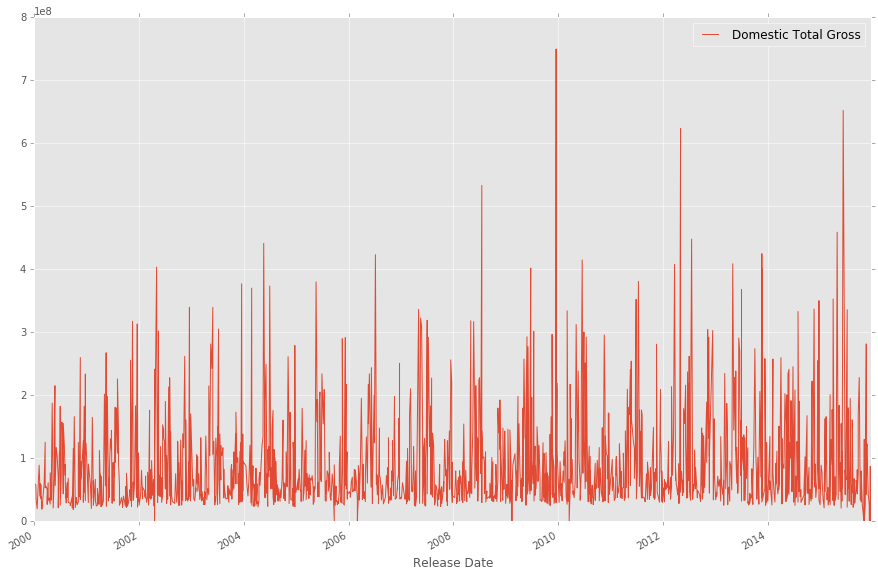

In [487]:
df.plot(x = 'Release Date', y = 'Domestic Total Gross',figsize=(15, 10))

## Challenge 2

In [300]:
df2=df.groupby(['Rating'])
df2

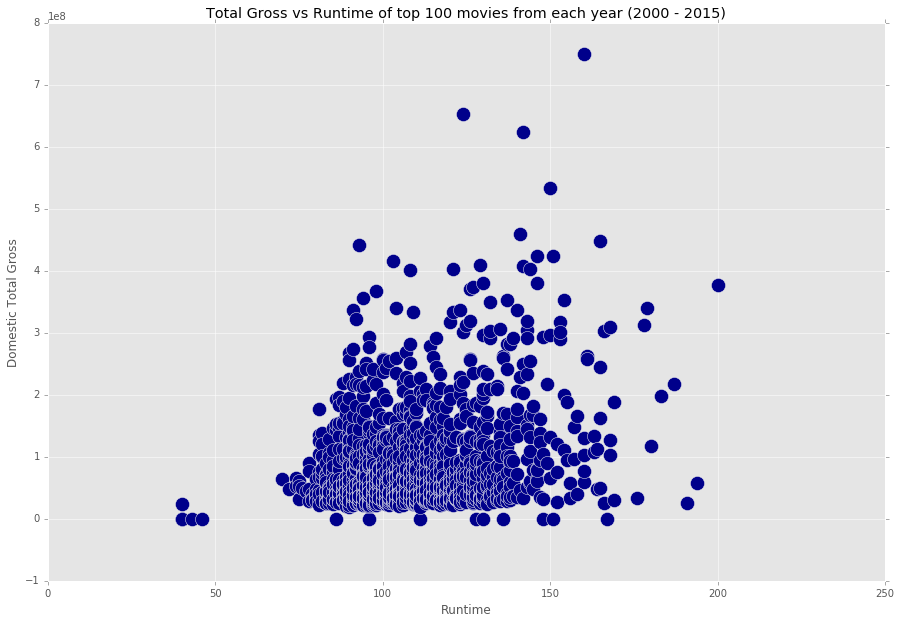

In [488]:
df.sort_values('Runtime', ascending=True).plot(kind='scatter',
                                               title = 'Total Gross vs Runtime of top 100 movies from each year (2000 - 2015)',
                                               x = 'Runtime', y = 'Domestic Total Gross', s=200,
                                               color ='darkblue',
                                               figsize = (15,10),
                                               )

## Challenge 3 




In [1]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df1 = df.sort_values(by=['Rating'], ascending = False).groupby("Rating")
print(df1)

NameError: name 'pd' is not defined

## Challenge 4
#### Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [207]:
df1 = df.groupby("Rating", as_index=False)

# for rating in df1['Rating']:
#     df1.plot(x = 'Runtime', y = 'Domestic Total Gross',        
#              figsize=(15, 10),
#             legend = False)

## Challenge 5

What director in your dataset has the highest gross per movie?